In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/PYTHON/MyData'
!ls

/content/drive/MyDrive/PYTHON/MyData
Car_Insurance_Claim.csv  data_square.csv      smoke_detection.csv
data_linear.csv		 googleplaystore.csv  winequality-white.csv
data_linear_missing.csv  housing.data
dataset.csv		 housing.names


**1. Define problem**

---



In [ ]:
#Thư viện
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#load data
car = pd.read_csv('Car_Insurance_Claim.csv')

In [ ]:
car.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [ ]:
print(f'The dataset has {car.shape[0]} rows and {car.shape[1]} columns.') 

The dataset has 10000 rows and 18 columns.


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  int64  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int64  
 10  children             10000 non-null  int64  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [ ]:
car['credit_score'].fillna(car['credit_score'].mean(), inplace=True)
car['annual_mileage'].fillna(car['annual_mileage'].mean(), inplace=True)

**2. Summary data**

---



[Text(0.5, 0, 'credit_score'),
 Text(1.5, 0, 'vehicle_ownership'),
 Text(2.5, 0, 'married'),
 Text(3.5, 0, 'children'),
 Text(4.5, 0, 'postal_code'),
 Text(5.5, 0, 'annual_mileage'),
 Text(6.5, 0, 'speeding_violations'),
 Text(7.5, 0, 'duis'),
 Text(8.5, 0, 'past_accidents'),
 Text(9.5, 0, 'outcome')]

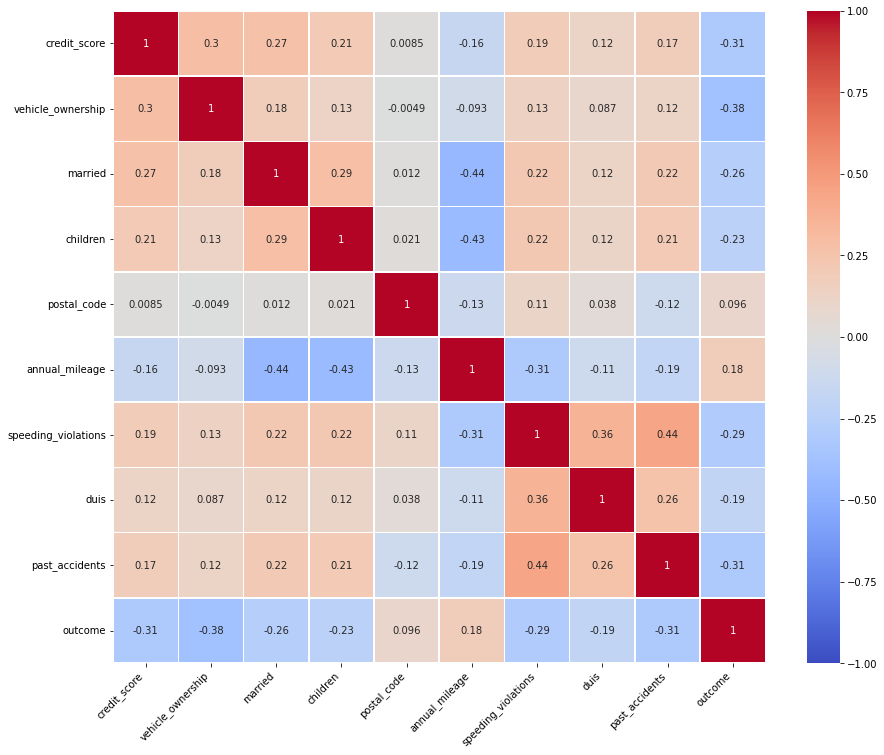

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))  
corr_matrix = car.corr() 
sns.heatmap(data=corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, center=0,
            square=True,  
            linecolor='white', linewidths=0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
features = ['age', 'gender', 'race', 'driving_experience', 'education', 'income', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'postal_code',  'vehicle_type', 'outcome']
def convert_cat(df, feature):
  for feature in features:
    df[feature] = df[feature].astype('category')

convert_cat(car, features)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  10000 non-null  category
 1   gender               10000 non-null  category
 2   race                 10000 non-null  category
 3   driving_experience   10000 non-null  category
 4   education            10000 non-null  category
 5   income               10000 non-null  category
 6   credit_score         10000 non-null  float64 
 7   vehicle_ownership    10000 non-null  category
 8   vehicle_year         10000 non-null  category
 9   married              10000 non-null  category
 10  children             10000 non-null  category
 11  postal_code          10000 non-null  category
 12  annual_mileage       10000 non-null  float64 
 13  vehicle_type         10000 non-null  category
 14  speeding_violations  10000 non-null  int64   
 15  duis                

In [ ]:
pd.set_option('precision', 2)
car.describe()

,credit_score,annual_mileage,speeding_violations,duis,past_accidents
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.52,11697.00,1.48,0.24,1.06
std,0.13,2680.17,2.24,0.55,1.65
min,0.05,2000.00,0.00,0.00,0.00
25%,0.43,10000.00,0.00,0.00,0.00
50%,0.52,11697.00,0.00,0.00,0.00
75%,0.61,13000.00,2.00,0.00,2.00
max,0.96,22000.00,22.00,6.00,15.00


In [ ]:
car.describe(include=['category'])

,age,gender,race,driving_experience,education,income,vehicle_ownership,vehicle_year,married,children,postal_code,vehicle_type,outcome
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2,2,2,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,1,before 2015,0,1,10238,sedan,0
freq,3063,5010,9012,3530,4157,4336,6970,6967,5018,6888,6940,9523,6867


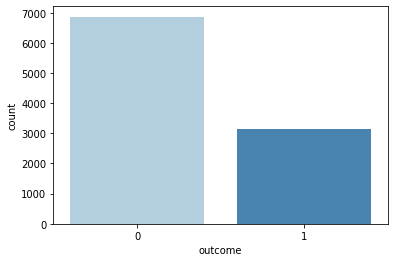

In [ ]:
sns.countplot(data=car, x='outcome', palette = 'Blues')

In [ ]:
car.outcome.value_counts(normalize=True)

0    0.69
1    0.31
Name: outcome, dtype: float64

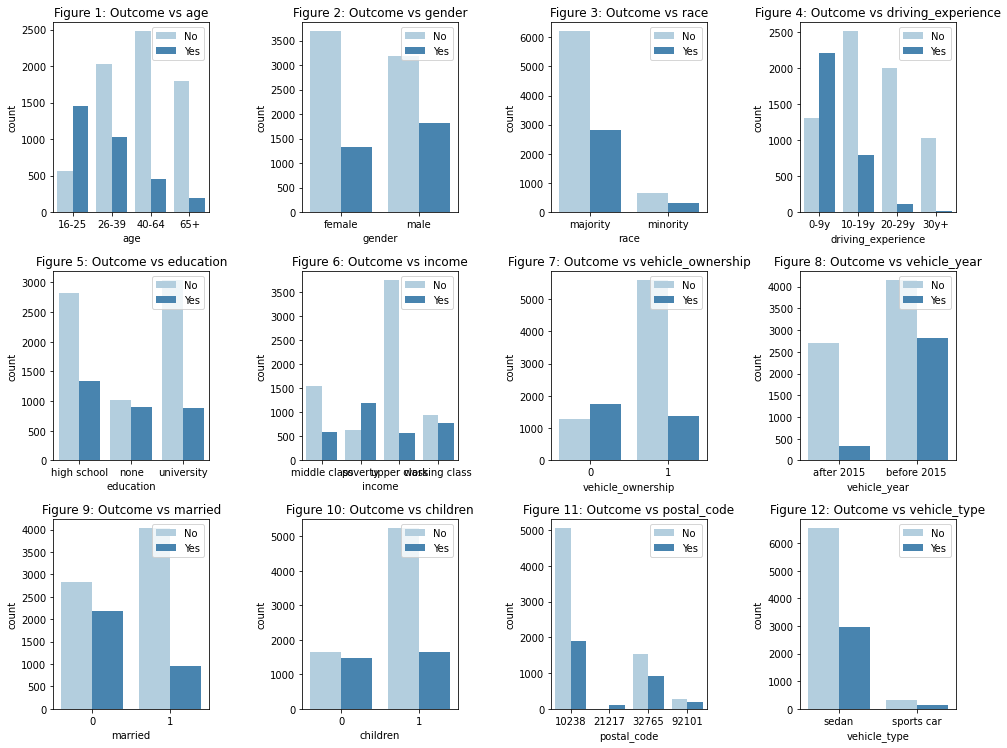

In [ ]:
cols =  ['age', 'gender', 'race', 'driving_experience', 'education', 'income', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'postal_code',  'vehicle_type']
n_rows = 3
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data = car, x = cols[i], hue = 'outcome', palette = 'Blues',ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Outcome vs {cols[i]}")
      ax_i.legend(title='', loc = 'upper right', labels = ['No','Yes'])

plt.tight_layout()

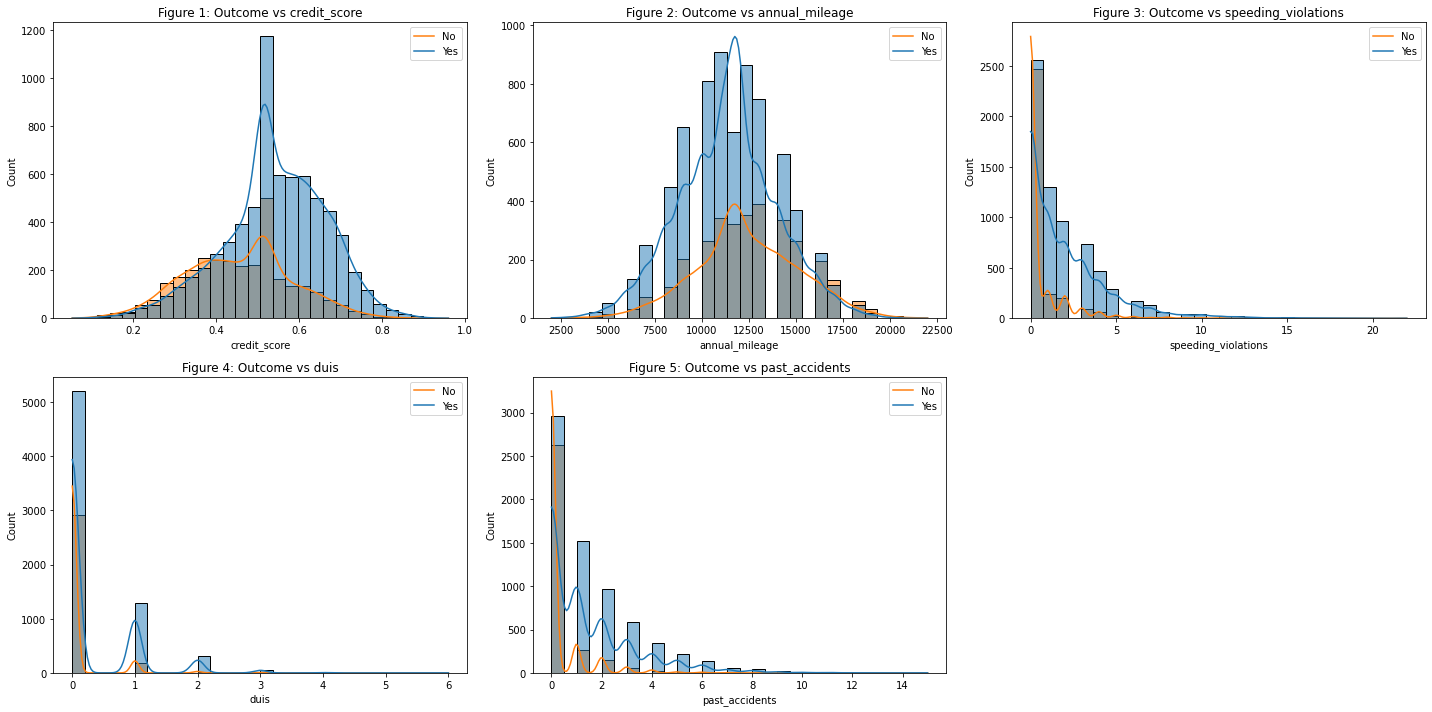

In [ ]:
cols =  ['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,10))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax[r,c]
      sns.histplot(data = car, x = cols[i], hue = 'outcome', bins = 30, kde = True, ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Outcome vs {cols[i]}")
      ax_i.legend(title='', loc = 'upper right', labels = ['No','Yes'])
ax.flat[-1].set_visible(False)
plt.tight_layout()

**3. Preprocessing data**

---



In [ ]:
data=car.drop(['postal_code'], axis=1)

label_var = data[['gender', 'race', 'education', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'vehicle_type']]
label_var = label_var.apply(LabelEncoder().fit_transform)

oe = OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'], ['0-9y', '10-19y', '20-29y', '30y+'], ['poverty', 'working class', 'middle class','upper class']])
ord_var = oe.fit_transform(data[['age', 'driving_experience', 'income']])

continuous_var = data[["credit_score", "past_accidents", "speeding_violations", "duis", "annual_mileage"]].values


In [ ]:
Y = data['outcome'].values
X = np.concatenate((ord_var, continuous_var, label_var),axis=1) 
X.shape , Y.shape  

((10000, 16), (10000,))

In [ ]:
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape, Y_train.shape

((8000, 16), (8000,))

In [ ]:
print('Trong {} giá trị outcome của tập Y_train thì có {} giá trị 0 và {} giá trị 1. Dẫn đến sự mất cân bằng'.format(Y_train.shape[0], (Y_train.shape[0] - sum(Y_train)), sum(Y_train)))

Trong 8000 giá trị outcome của tập Y_train thì có 5500 giá trị 0 và 2500 giá trị 1. Dẫn đến sự mất cân bằng


**4. Evaluate algorithms**

---



In [ ]:
num_folds = 5
scoring = 'f1'

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.704649 (0.032929)
LDA: 0.715712 (0.014853)
KNN: 0.660542 (0.013983)
CART: 0.626226 (0.017283)
NB: 0.686431 (0.020370)
SVM: 0.000789 (0.001578)


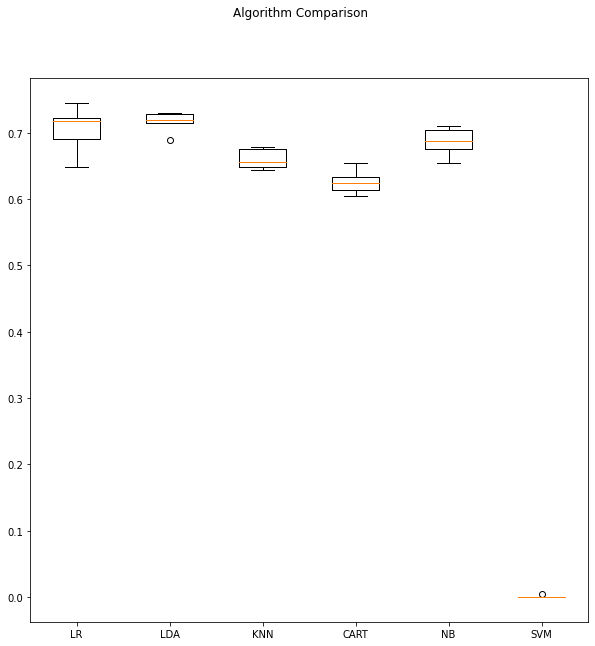

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.737663 (0.019575)
ScaledLDA: 0.715712 (0.014853)
ScaledKNN: 0.689139 (0.011445)
ScaledCART: 0.625813 (0.012550)
ScaledNB: 0.686505 (0.017503)
ScaledSVM: 0.728587 (0.021067)


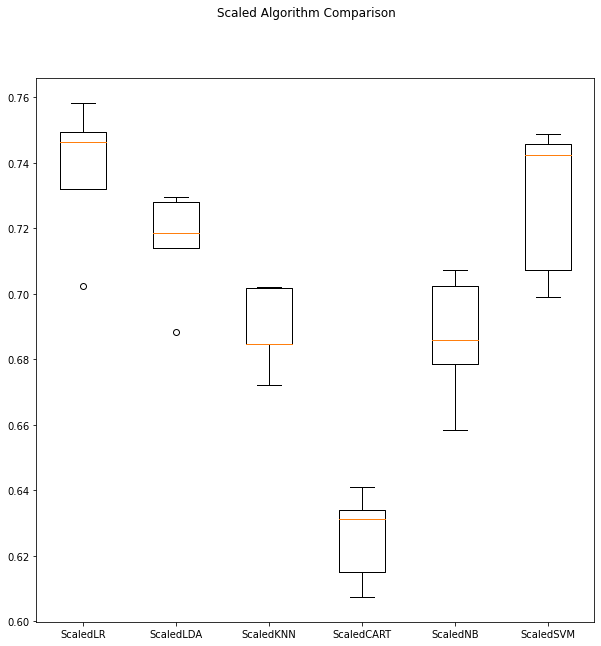

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.725862 (0.017422)
GBM: 0.739655 (0.018065)
RF: 0.701155 (0.011162)
ET: 0.682866 (0.009380)


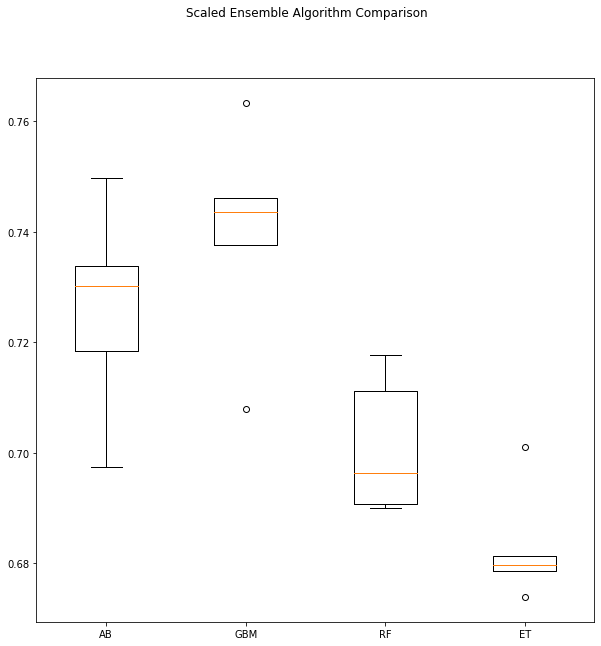

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**5. Improve results**

---



In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
learning_rate=[0.01, 0.05, 0.1, 0.5, 1]
n_estimators=[5, 50, 100, 250, 500]
max_depth=[1, 3, 5 , 7, 9]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.740006 using {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.531819 (0.024321) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.626897 (0.016727) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.679269 (0.016689) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.506413 (0.011518) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.667599 (0.017758) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.726754 (0.024394) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.739116 (0.020733) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max

**6. Present results**

---



              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1367
           1       0.78      0.70      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000

ROC AUC score: 0.896555111399254
F1 Score:  0.7371048252911814


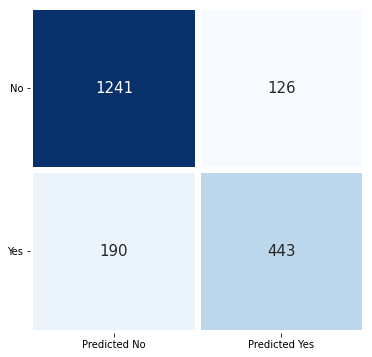

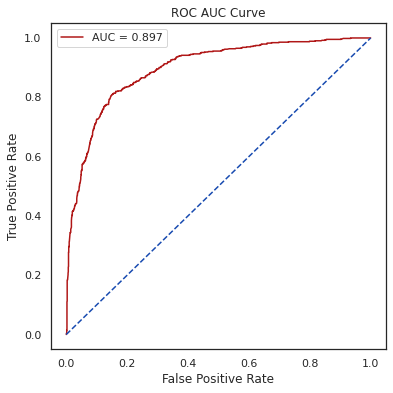

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


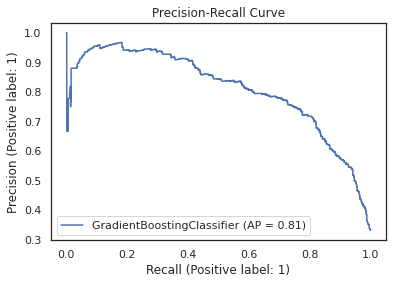

In [ ]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(n_estimators= 100, max_depth=3 , learning_rate=0.05)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_validation)
y_prob = classifier.predict_proba(X_validation)[:,1]
cm = confusion_matrix(Y_validation, y_pred)

print(classification_report(Y_validation, y_pred))
print(f'ROC AUC score: {roc_auc_score(Y_validation, y_prob)}')
print('F1 Score: ',f1_score(Y_validation, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'Yes'], xticklabels = ['Predicted No', 'Predicted Yes'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_validation, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
accuracies = {}
acc = accuracy_score(Y_validation, y_pred)*100
accuracies['Gradient Boosting'] = acc
sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(Y_validation, y_prob)
disp = plot_precision_recall_curve(classifier, X_validation, Y_validation)
plt.title('Precision-Recall Curve')
plt.show()